In [1]:
from google.colab import files

In [ ]:
files.upload()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
import tensorflow as tf

In [4]:
df=pd.read_csv('heart.csv')

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


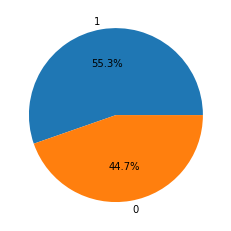

In [6]:
plt.pie(list(df['HeartDisease'].value_counts()),labels=[1,0],autopct='%2.1f%%')
plt.show()

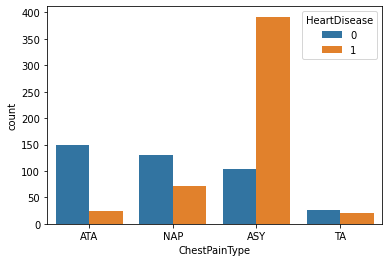

In [7]:
sns.countplot(x='ChestPainType',hue='HeartDisease',data=df)

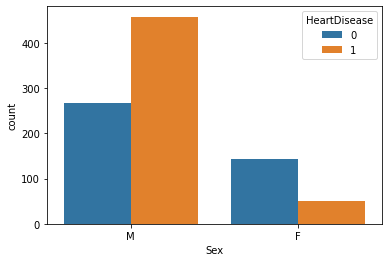

In [8]:
sns.countplot(x='Sex',hue='HeartDisease',data=df)

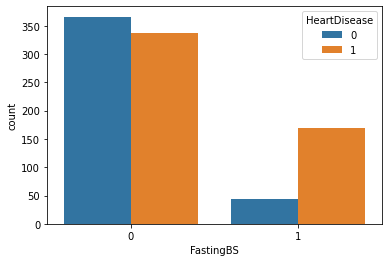

In [9]:
sns.countplot(x='FastingBS',hue='HeartDisease',data=df)

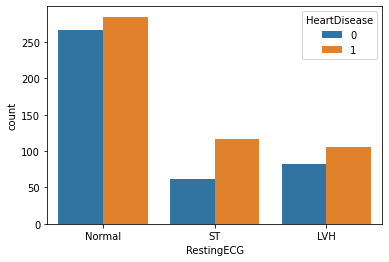

In [10]:
sns.countplot(x='RestingECG',hue='HeartDisease',data=df)

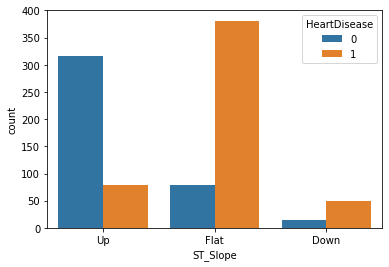

In [11]:
sns.countplot(x='ST_Slope',hue='HeartDisease',data=df)

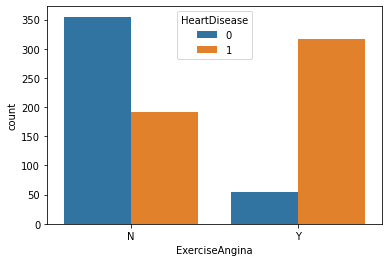

In [12]:
sns.countplot(x='ExerciseAngina',hue='HeartDisease',data=df)

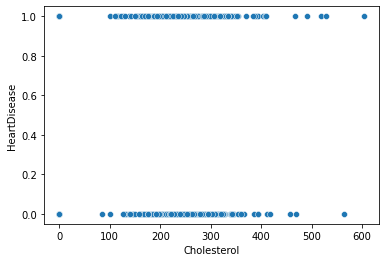

In [13]:
sns.scatterplot(x='Cholesterol',y='HeartDisease',data=df)

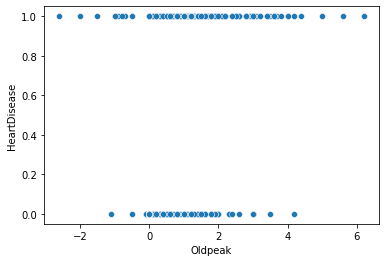

In [14]:
sns.scatterplot(x='Oldpeak',y='HeartDisease',data=df)

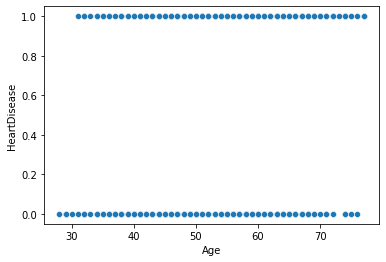

In [15]:
sns.scatterplot(x='Age',y='HeartDisease',data=df)

**Visalize the data based on over 60 age's people**

In [16]:
df[df['Age']>60].shape

(221, 12)

In [17]:
df60=df[df['Age']>60]

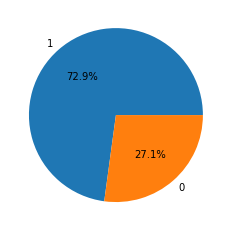

In [18]:
plt.pie(list(df60['HeartDisease'].value_counts()),labels=[1,0],autopct='%2.1f%%')
plt.show()

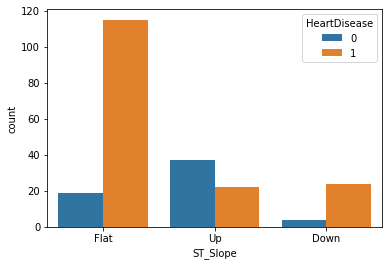

In [19]:
sns.countplot(x='ST_Slope',hue='HeartDisease',data=df60)

**Convert the data from string to numeric digit for best fit**

In [20]:
Lab=LabelEncoder()
for columns in df.columns:
  if df[columns].dtype=='object':
    df[columns]=Lab.fit_transform(df[columns])

In [21]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


**Distribute the Dependent and Independent Variables**

In [22]:
x=df.drop(["HeartDisease"],axis=1)

In [23]:
y=df['HeartDisease']

**Now, I will select those 9 feature whose are giving best score for our labels**

In [24]:
Feature=SelectKBest()

In [25]:
Feature.fit(x,y)

SelectKBest()

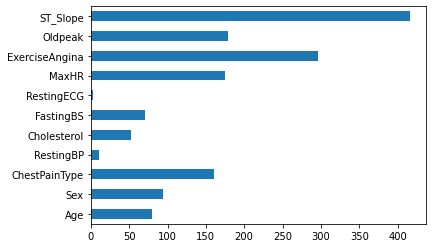

In [26]:
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [27]:
topper=list(pd.Series(Feature.scores_,index=x.columns).nlargest(9).keys())

In [28]:
x=df[topper]
y=df['HeartDisease']

In [29]:
Extra=ExtraTreesClassifier(n_estimators=10)

In [30]:
Extra.fit(x,y)

ExtraTreesClassifier(n_estimators=10)

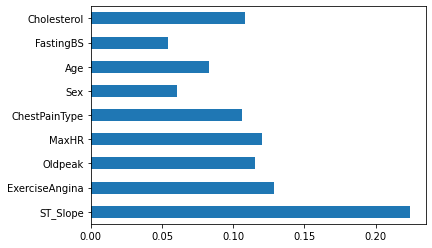

In [31]:
pd.Series(Extra.feature_importances_,index=x.columns).plot(kind='barh')

**Scaling all features With Standard Scaler**

In [32]:
Scaler=StandardScaler()
Sx=Scaler.fit_transform(x)

**Distribute train and test data:**
Train_data=90%
Test_data=10%

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(Sx,y,test_size=0.10,random_state=1)

**Cross Validation Technique for ML Algorithms**

In [34]:
Forest=RandomForestClassifier(n_estimators=10)
Tree=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=45)
Logi=LogisticRegression()
Support=SVC()
GNB=GaussianNB()
LGBM=LGBMClassifier()
BNB=BernoulliNB()
Algo=[Forest,Tree,KNN,Logi,Support,GNB,BNB,LGBM]
Algo_name=["RFC","DTC","KNN","LR","SVM","GNB","BNB","LGBM"]
Scores=[]
Average=[]
for i in Algo:
  cv_score=cross_val_score(i,Sx,y,cv=10)
  Scores.append(cv_score)
  Average.append(cv_score.mean())
Algo_name=pd.DataFrame(Algo_name,columns=['Algorithm name'])
Scores=pd.DataFrame(Scores)
Average=pd.DataFrame(Average,columns=['Average'])
Table=pd.concat([Algo_name,Scores],axis=1)
Table=pd.concat([Table,Average],axis=1)
Table

,Algorithm name,0,1,2,3,4,5,6,7,8,9,Average
0,RFC,0.836957,0.902174,0.869565,0.869565,0.858696,0.847826,0.880435,0.739130,0.747253,0.780220,0.833182
1,DTC,0.760870,0.847826,0.771739,0.826087,0.815217,0.815217,0.815217,0.695652,0.747253,0.692308,0.778739
2,KNN,0.771739,0.858696,0.880435,0.858696,0.858696,0.869565,0.902174,0.771739,0.769231,0.813187,0.835416
3,LR,0.782609,0.880435,0.869565,0.880435,0.869565,0.836957,0.891304,0.793478,0.769231,0.791209,0.836479
4,SVM,0.869565,0.934783,0.891304,0.891304,0.880435,0.858696,0.858696,0.771739,0.780220,0.802198,0.853894
5,GNB,0.804348,0.858696,0.945652,0.913043,0.836957,0.793478,0.923913,0.782609,0.791209,0.780220,0.843012
6,BNB,0.826087,0.902174,0.836957,0.858696,0.869565,0.836957,0.891304,0.804348,0.725275,0.813187,0.836455
7,LGBM,0.902174,0.902174,0.923913,0.858696,0.836957,0.869565,0.858696,0.739130,0.747253,0.747253,0.838581


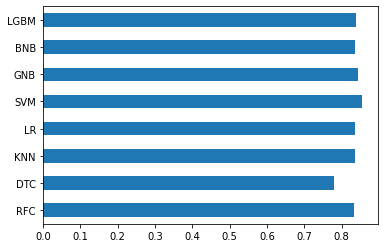

In [35]:
Average=list(Table['Average'])
pd.Series(Average,index=list(Table['Algorithm name'])).plot(kind='barh')

**Pick the best Algorithm based on Cross Validation**

In [37]:
Cross=Algo[Average.index(max(Average))]

**Finally fit the features and labels**

In [38]:
Cross.fit(xtrain,ytrain)
Cross.score(Sx,y)

0.8932461873638344

In [39]:
Cross_Score=Cross.score(Sx,y)

***Stacking_Classifier***

In [40]:
Algo_name1=[("RFC",Forest),("DTC",Tree),("KNN",KNN),("SVM",Support),("GNB",GNB),("BNB",BNB),("LGBM",LGBM)]
from sklearn.ensemble import StackingClassifier
Lr=LogisticRegression()
Stacking=StackingClassifier(estimators=Algo_name1,final_estimator=Lr)
Stacking.fit(Sx,y)
Stacking.score(Sx,y)

0.9052287581699346

In [41]:
Stack_Score=Stacking.score(Sx,y)

**Pick the Best from all method**

**Stacking Classifier works better than Cross Validation**

**So I will pick Stacking Classifier to final work**

In [43]:
if(Stack_Score>Cross_Score):
  Best=Stacking
  Best.fit(xtrain,ytrain)
else:
  Best=Cross
  Best.fit(xtrain,ytrain)

In [44]:
Best.score(xtest,ytest)

0.9565217391304348

***Evaluation Part***

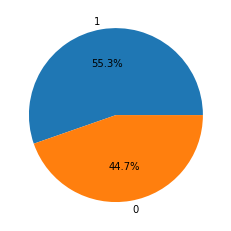

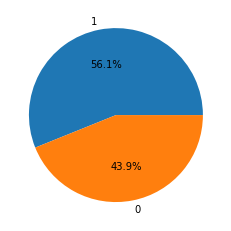

In [45]:
plt.pie(list(df['HeartDisease'].value_counts()),labels=[1,0],autopct='%2.1f%%')
plt.show()
plt.pie(list(pd.DataFrame(Best.predict(Sx)).value_counts()),labels=[1,0],autopct='%2.1f%%')
plt.show()

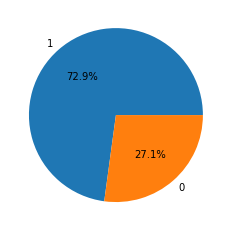

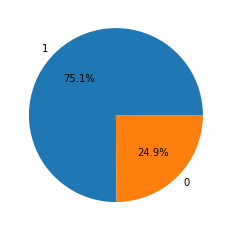

In [46]:
df['Predicted']=Best.predict(Sx)
df60=df[df['Age']>60]
plt.pie(list(df60['HeartDisease'].value_counts()),labels=[1,0],autopct='%2.1f%%')
plt.show()
plt.pie(list(df60['Predicted'].value_counts()),labels=[1,0],autopct='%2.1f%%')
plt.show()

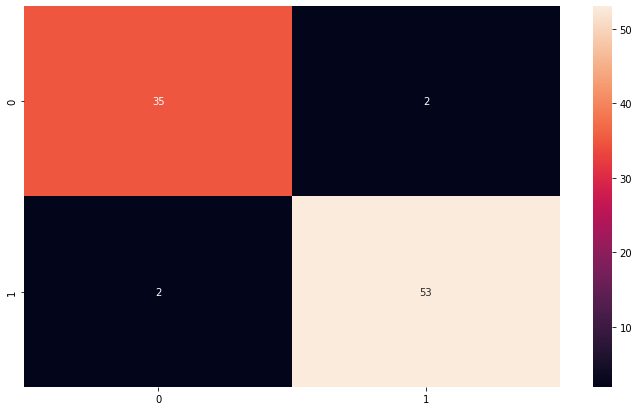

In [47]:
pred=Best.predict(xtest)
con_matrix=tf.math.confusion_matrix(labels=ytest,predictions=pred)
plt.figure(figsize=(12,7))
sns.heatmap(con_matrix,annot=True,fmt='d')

In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.96      0.96      0.96        55

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92



**Prediction Part**

In [ ]:
Check=[]
for i in x.columns:
  K=input(f"Enter {i} from your report:")
  Check.append(K)

In [51]:
Check=x[:1]

In [52]:
Best.predict(Scaler.transform(Check))

array([0])